<a href="https://colab.research.google.com/github/anytaaly/Amazon/blob/master/Logistic_regression_housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib


In [2]:
# Load the California Housing dataset
housing = fetch_california_housing()

In [4]:
# Create a pandas DataFrame with the data
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['PRICE'] = housing.target

In [5]:
# Display the first few rows
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
# Basic data exploration
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
housing_df.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
PRICE,float64


In [8]:
# Check for missing values
housing_df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
PRICE,0


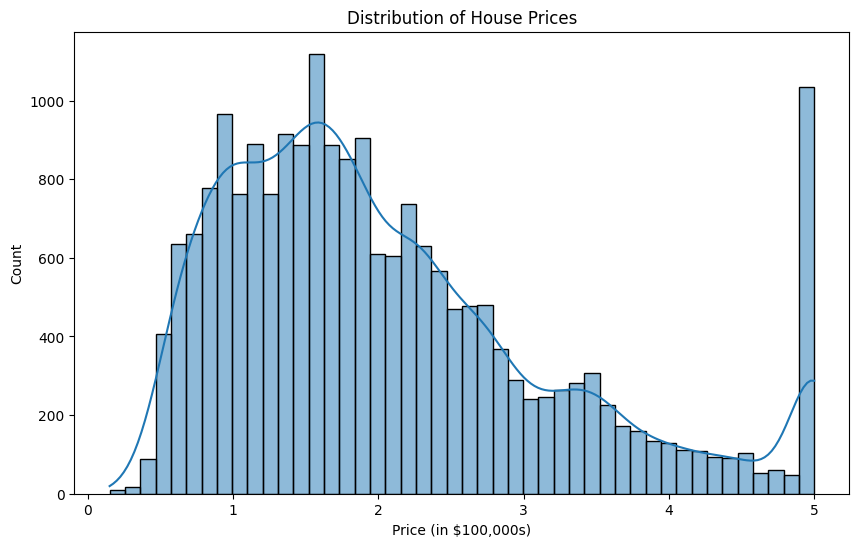

In [9]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(housing_df['PRICE'], kde=True)
plt.title('Distribution of House Prices across Calofornia Block Groups.')
plt.xlabel('Price (in $100,000s)')
plt.show()

This model suggests there might be two distinct types of housing markets exist for the given state - a large mainstream market centered around $150,000 - $200,000 and a premium/luxury market centered around $500,000.

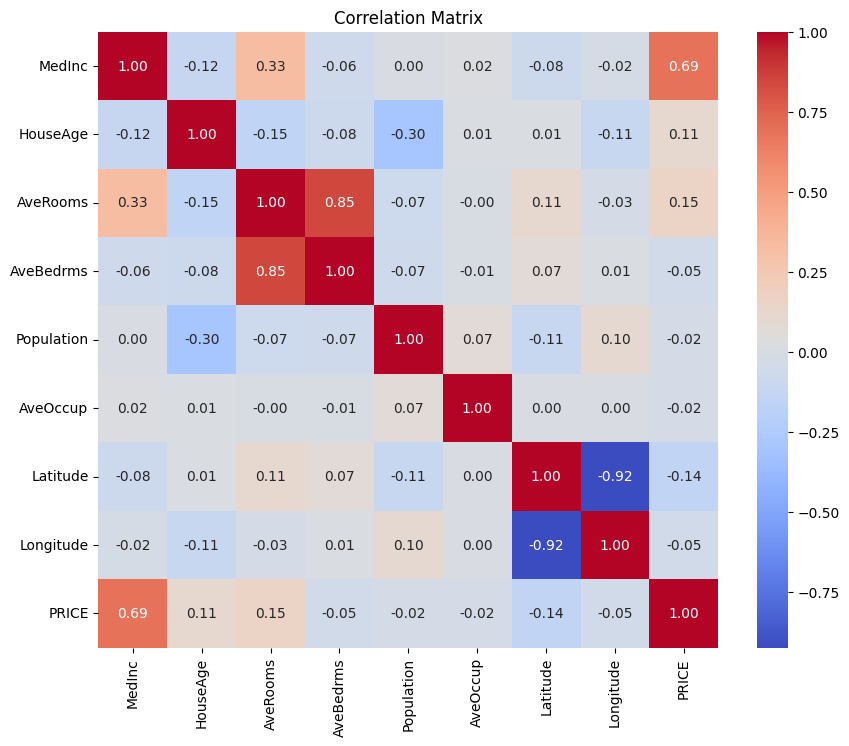

In [12]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = housing_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

1- Median Income and House Prices (0.69)


*   The strongest predictor of house prices is median income

*   This makes intutive sense: wealthier areas tend to have more expensive houses.

2- Rooms and Bedrooms (0.85)


*   Strong correlation between average rooms and average bedrooms.
*   This suggests multicollinearity (these variables contain similar information)


3- House Age


*   Moderate positive correlation with price (0.11)
*   Negative correlation with number of rooms (-0.15)



In [13]:
# Prepare the data for modeling
X = housing_df.drop('PRICE', axis=1)
y = housing_df['PRICE']

# Scale the features (transforming the numerical input variables to have similar ranges or distributions.)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)
print(y_pred_linear)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Linear Regression Results:')
print(f'Mean Squared Error: {mse_linear:.4f}')
print(f'R² Score: {r2_linear:.4f}')

[0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]
Linear Regression Results:
Mean Squared Error: 0.5559
R² Score: 0.5758


# Scaled feature data
for training (contains all your housing features like MedInc, HouseAge, etc.)

In [19]:
print(X_train)

[[-0.32165429  0.34647803 -0.16625886 ...  0.05980847 -1.36797628
   1.26764451]
 [-0.03061993  1.61780729 -0.3861807  ... -0.12830597 -0.87169852
   0.7036268 ]
 [ 0.1503488  -1.95780625  0.08764093 ... -0.03345346 -0.45501247
  -0.45435647]
 ...
 [-0.49283239  0.58485227 -0.58294927 ...  0.02517025 -0.74997001
   0.59381804]
 [ 0.97302487 -1.08376738  0.39058403 ...  0.01042151  0.91209231
  -1.19306993]
 [-0.68174943  1.85618152 -0.81905034 ... -0.09262259  1.00104776
  -1.42267006]]


#Actual house prices for the training set
Each line shows:

The index number (left side): This is just the row/position identifier in the dataset (e.g., 14196, 8267, 17445)

The price value (right side): This is the actual median house price for that block group, in units of $100,000s

In [17]:
print(y_train)

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: PRICE, Length: 16512, dtype: float64


In [20]:
# Random Forest Regression (for comparison)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Regression Results:')
print(f'Mean Squared Error: {mse_rf:.4f}')
print(f'R² Score: {r2_rf:.4f}')

Random Forest Regression Results:
Mean Squared Error: 0.2555
R² Score: 0.8050


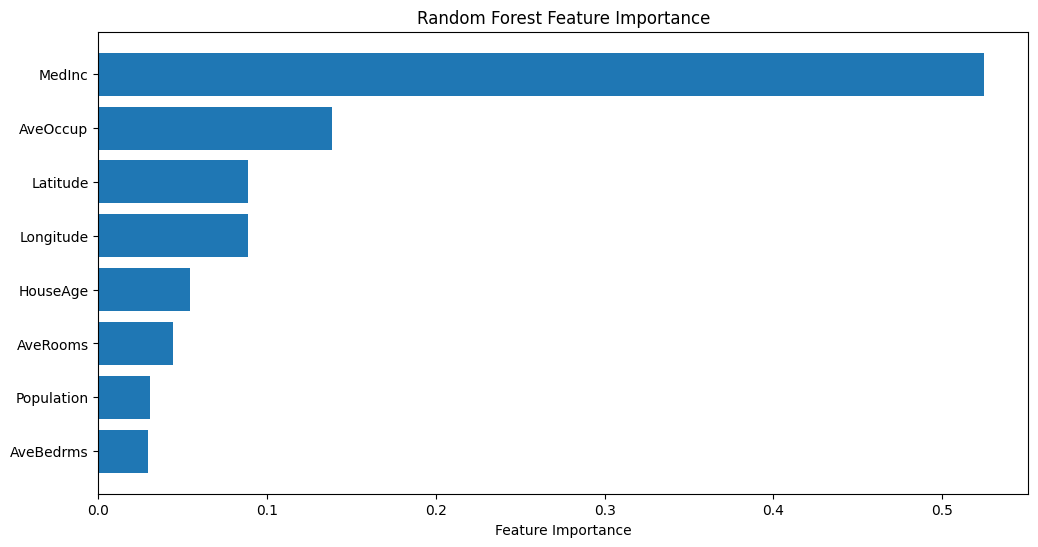

In [21]:
# Feature importance (for Random Forest)
plt.figure(figsize=(12, 6))
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [housing.feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

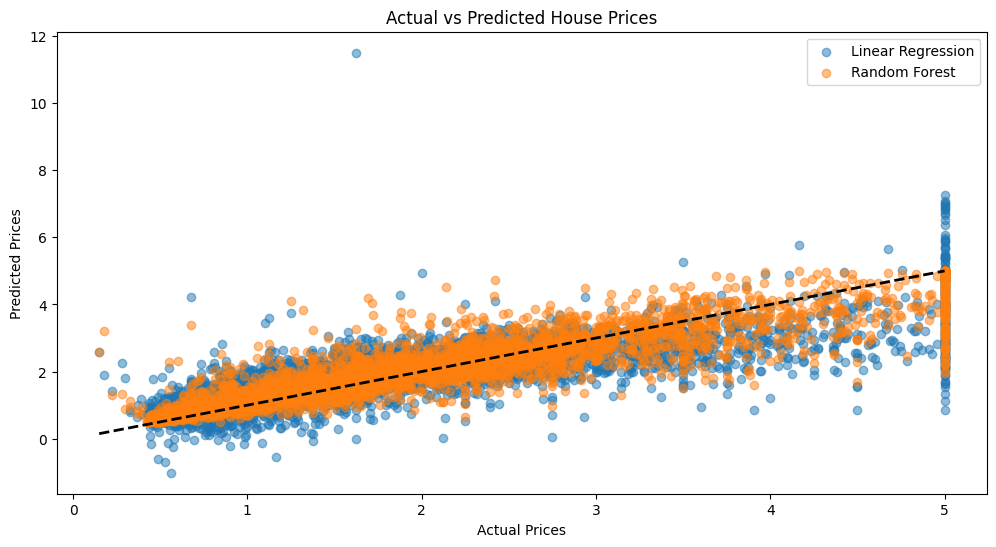

In [22]:
# Compare predictions visually
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()

In [23]:
# Save the models
joblib.dump(linear_model, 'linear_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']